In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

In [107]:
aus2021_a ='2021Census_G54A_AUS_AUS.csv'
aus2021_b ='2021Census_G54B_AUS_AUS.csv'
aus2021_c ='2021Census_G54C_AUS_AUS.csv'
aus2021_d ='2021Census_G54D_AUS_AUS.csv'
aus2021=[aus2021_a,aus2021_b,aus2021_c,aus2021_d]
aus2016_a ='2016Census_G51A_AUS.csv'
aus2016_b ='2016Census_G51B_AUS.csv'
aus2016_c ='2016Census_G51C_AUS.csv'
aus2016_d ='2016Census_G51D_AUS.csv'
aus2016=[aus2016_a,aus2016_b,aus2016_c,aus2016_d]

In [108]:
def clean_AUSdata(files):
    industries=[]
    numbers=[]
    for file in files:
        with open(file,'r') as f:
            content=f.read()
        data=content.splitlines()
        categories=data[0].split(',')
        num=data[1].split(',')
        sub_industries=[]
        sub_numbers=[]
        for i in range(len(categories)):
            if 'Tot' in categories[i] and categories[i][0]=='P':
                sub_industries.append(categories[i].strip('P_').strip('_Tot'))
                sub_numbers.append(int(num[i]))
        industries+=sub_industries
        numbers+=sub_numbers
    return list(zip(industries[:-10], numbers[:-10])) #ignore the total of age groups and the total population
clean_aus2021=clean_AUSdata(aus2021)
clean_aus2016=clean_AUSdata(aus2016)

In [147]:
#get long specific industries from AUS2021 data
metadata_aus2021 = pd.ExcelFile('Metadata_2021_GCP_DataPack_R1_R2.xlsx')
descriptors_aus2021 = pd.read_excel(metadata_aus2021, sheet_name='Cell Descriptors Information')
descriptors_aus2021 = descriptors_aus2021.dropna()
descriptors_aus2021.reset_index(inplace=True)
descriptors_aus2021.columns = descriptors_aus2021.iloc[0]
descriptors_aus2021 = descriptors_aus2021[descriptors_aus2021['Profiletable']=='G54']
long_ind = list(descriptors_aus2021['Long'])
long_industries = []
for i in range(len(long_ind)):
    if long_ind[i][0]=='P' and 'Total' in long_ind[i]:
        long_industries.append(long_ind[i].replace('PERSONS_','').replace('_Total',''))
long_industries=long_industries[:-10]

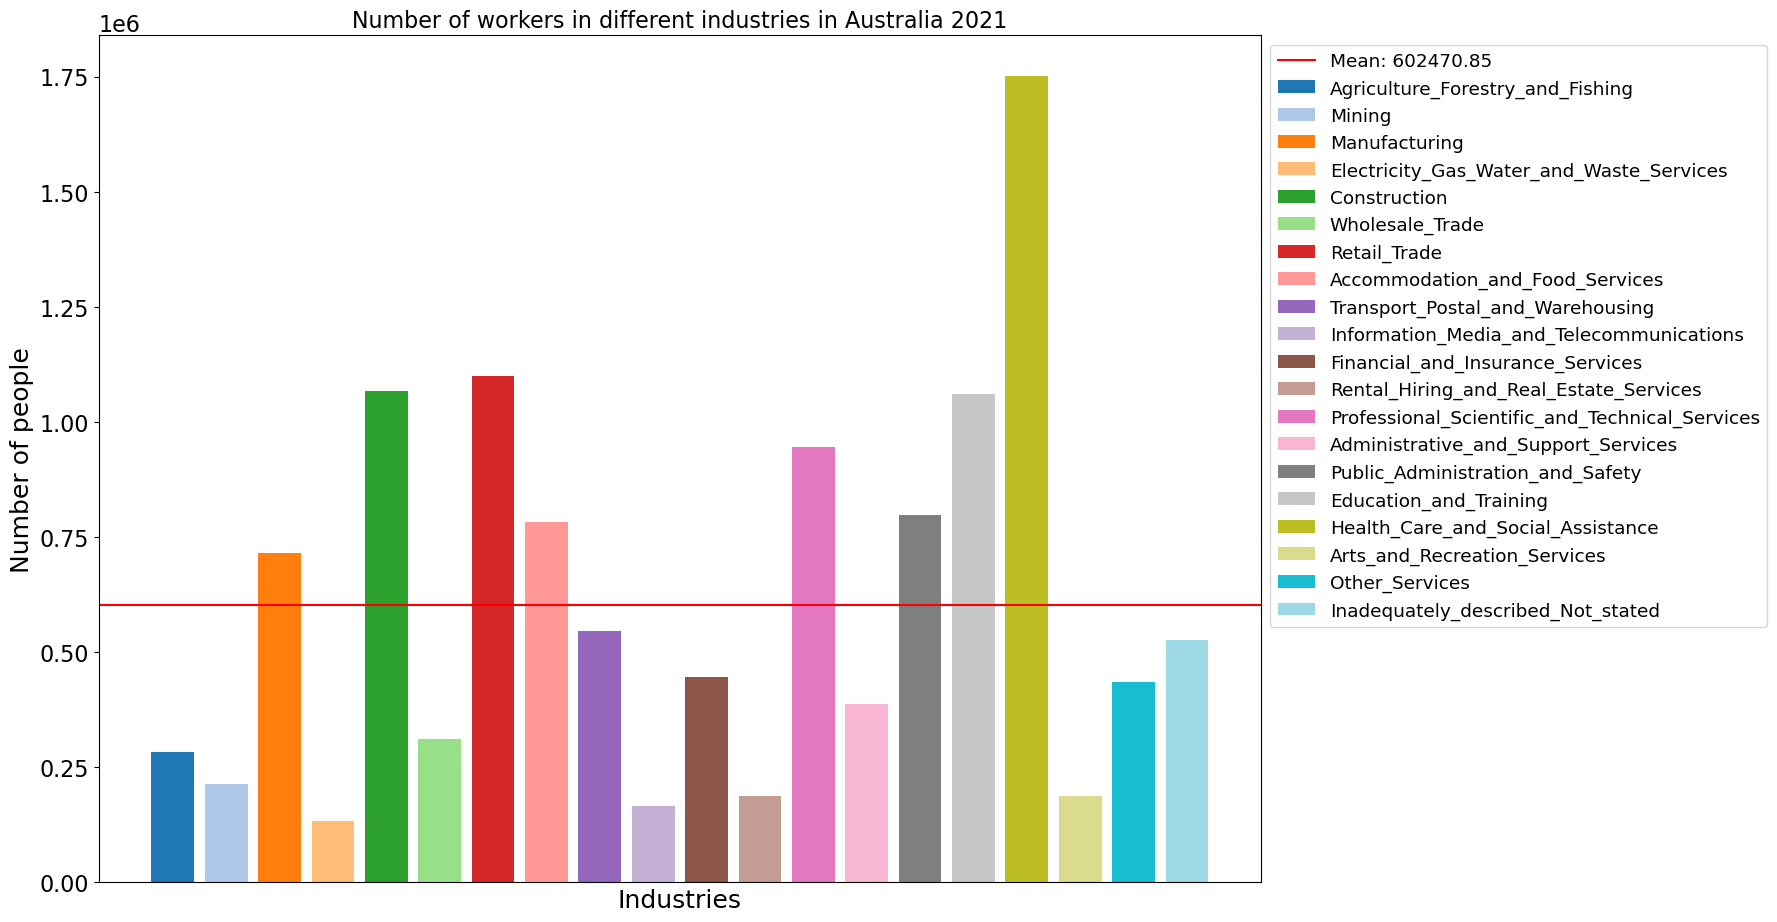

In [238]:
def plot_AUS(files, industries, year):
    plt.figure(figsize=(15, 11))
    ind, num=zip(*clean_AUSdata(files))
    color_map = plt.cm.tab20(np.linspace(0, 1, len(ind)))
    for i in range(len(ind)):
        plt.bar(ind[i],num[i], color=color_map[i], label= industries[i])
    plt.axhline(np.mean(num), color='red', label=f'Mean: {np.mean(num):.2f}')
    plt.xticks([])
    plt.xlabel('Industries')
    plt.ylabel('Number of people')
    plt.title('Number of workers in different industries in Australia '+year)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
    plt.show()
plot_AUS(aus2021, long_industries, '2021')
#this is the plot we need for question 2

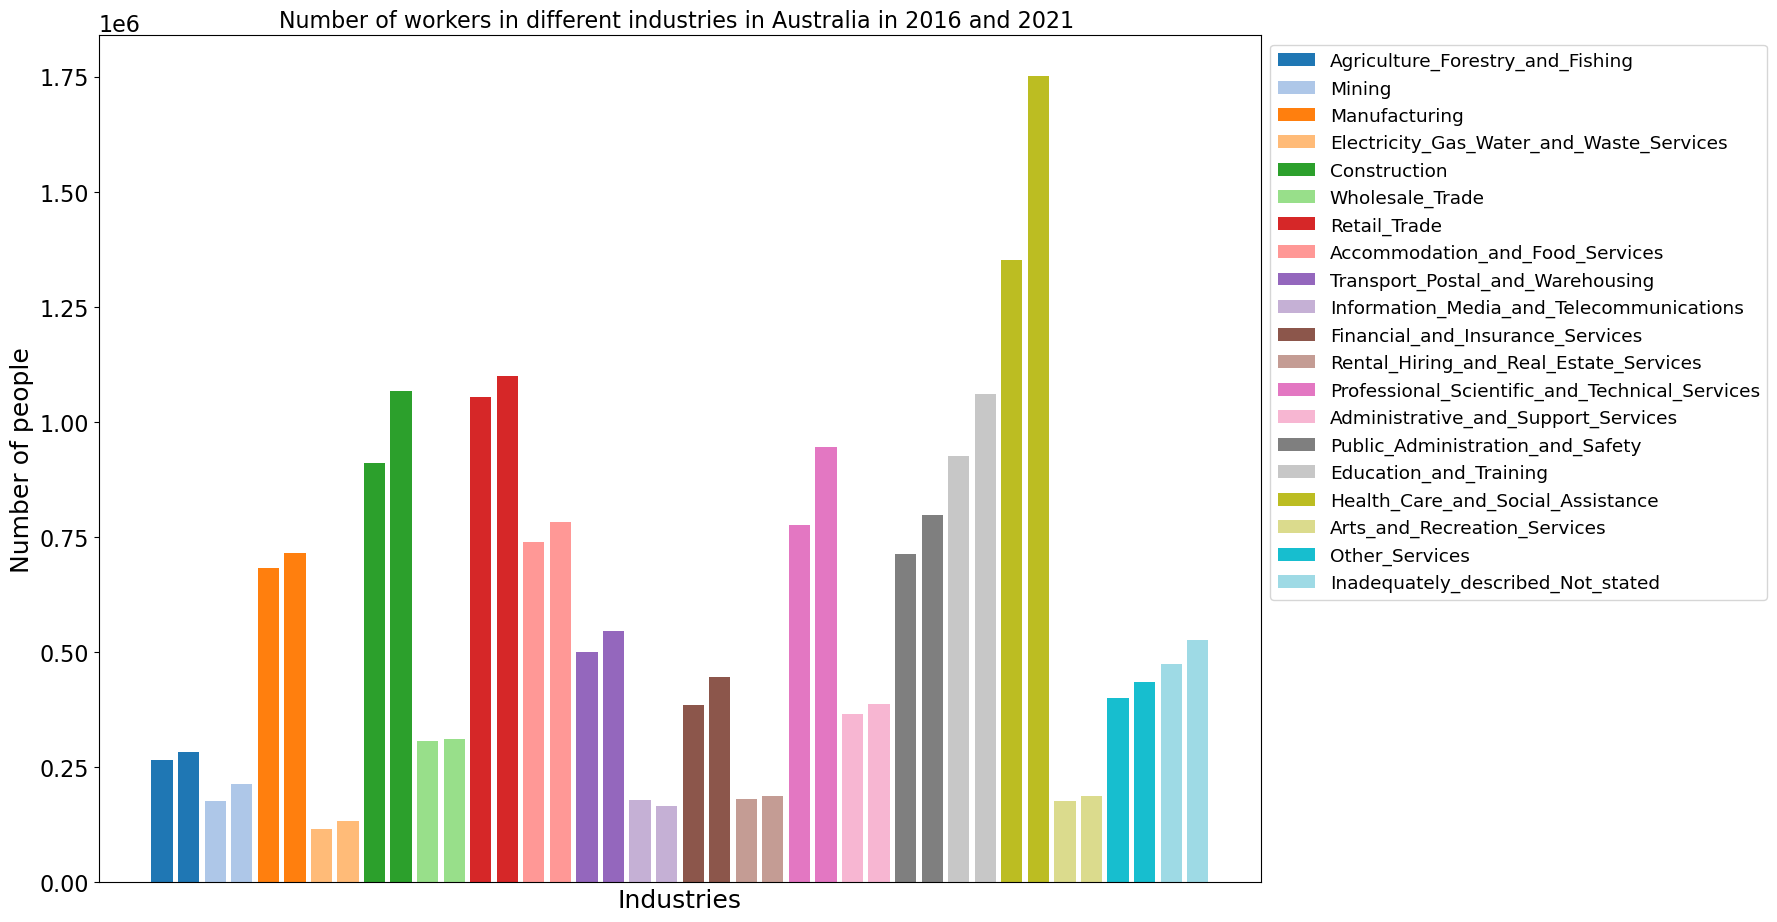

In [240]:
def plot_AUS_mix(file_2016, file_2021, industries):
    plt.figure(figsize=(15, 11))
    industries2016, numbers2016=zip(*clean_AUSdata(file_2016))
    industries2021, numbers2021=zip(*clean_AUSdata(file_2021))
    mix_industries=[]
    mix_numbers=[]
    for i in range(len(industries2016)):
        mix_industries.append(industries[i]+' 2016')
        mix_industries.append(industries[i]+' 2021')
        mix_numbers.append(numbers2016[i])
        mix_numbers.append(numbers2021[i])
    color_map = plt.cm.tab20(np.linspace(0, 1, len(mix_industries)))
    for i in range(len(mix_industries)):
        if i%2==0: #only label once for 2016
            label=industries[i//2]
        else:
            label=''
        plt.bar(mix_industries[i],mix_numbers[i], color=color_map[i], label=label)
    plt.xticks([])
    plt.xlabel('Industries')
    plt.ylabel('Number of people')
    plt.title('Number of workers in different industries in Australia in 2016 and 2021 ')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.show()
plot_AUS_mix(aus2016, aus2021, long_industries)
#this is the plot we need for question 3

** 
This plot combines data of Australia in 2016 and 2021. Each color determines 1 specific industries, there are pairs of bars that have the same color which indicate the number of workers working in that industry in 2016 (the first bar) and the number of workers working in that industry in 2021 (the second bar with that same color). The difference between 2 bars with the same color is how number of workers in the industry changed over 5 years.

In [278]:
us2023='ACSST1Y2023.S2401-Data.csv'
us2016='ACSST1Y2016.S2403-Data.csv'
def clean_USdata2023(file):
    with open(file,'r') as f:
        content=f.read()
    data=content.splitlines()
    categories=data[1].split('","')[2:]
    num=data[2].split('","')[2:]
    industries=[]
    numbers=[]
    health_num=0
    for i in range(len(categories)):
        cat_split=categories[i].split('!!')
        if len(cat_split)==5 and 'Margin of Error' not in cat_split and cat_split[1]=='Total':
            if  'Healthcare' in cat_split[-1]:
                health_num+=int(num[i])
            else:
                industries.append(cat_split[-1].strip(':'))
                numbers.append(int(num[i]))
    #merge 2 healthcare-related industries
    industries.append('Healthcare')
    numbers.append(health_num)
    return list(zip(industries, numbers))
def clean_USdata2016(file):
    with open(us2016,'r') as f:
        content=f.read()
    data=content.splitlines()
    categories=data[1].split('","')[2:]
    num=data[2].split('","')[2:]
    industries=[]
    numbers=[]
    health_num=0
    for i in range(len(categories)):
        cat_split=categories[i].split('!!')
        if len(cat_split)==4 and 'Margin of Error' not in cat_split and cat_split[0]=='Total':
            industries.append(cat_split[-1])
            numbers.append(int(num[i]))
    return list(zip(industries, numbers))

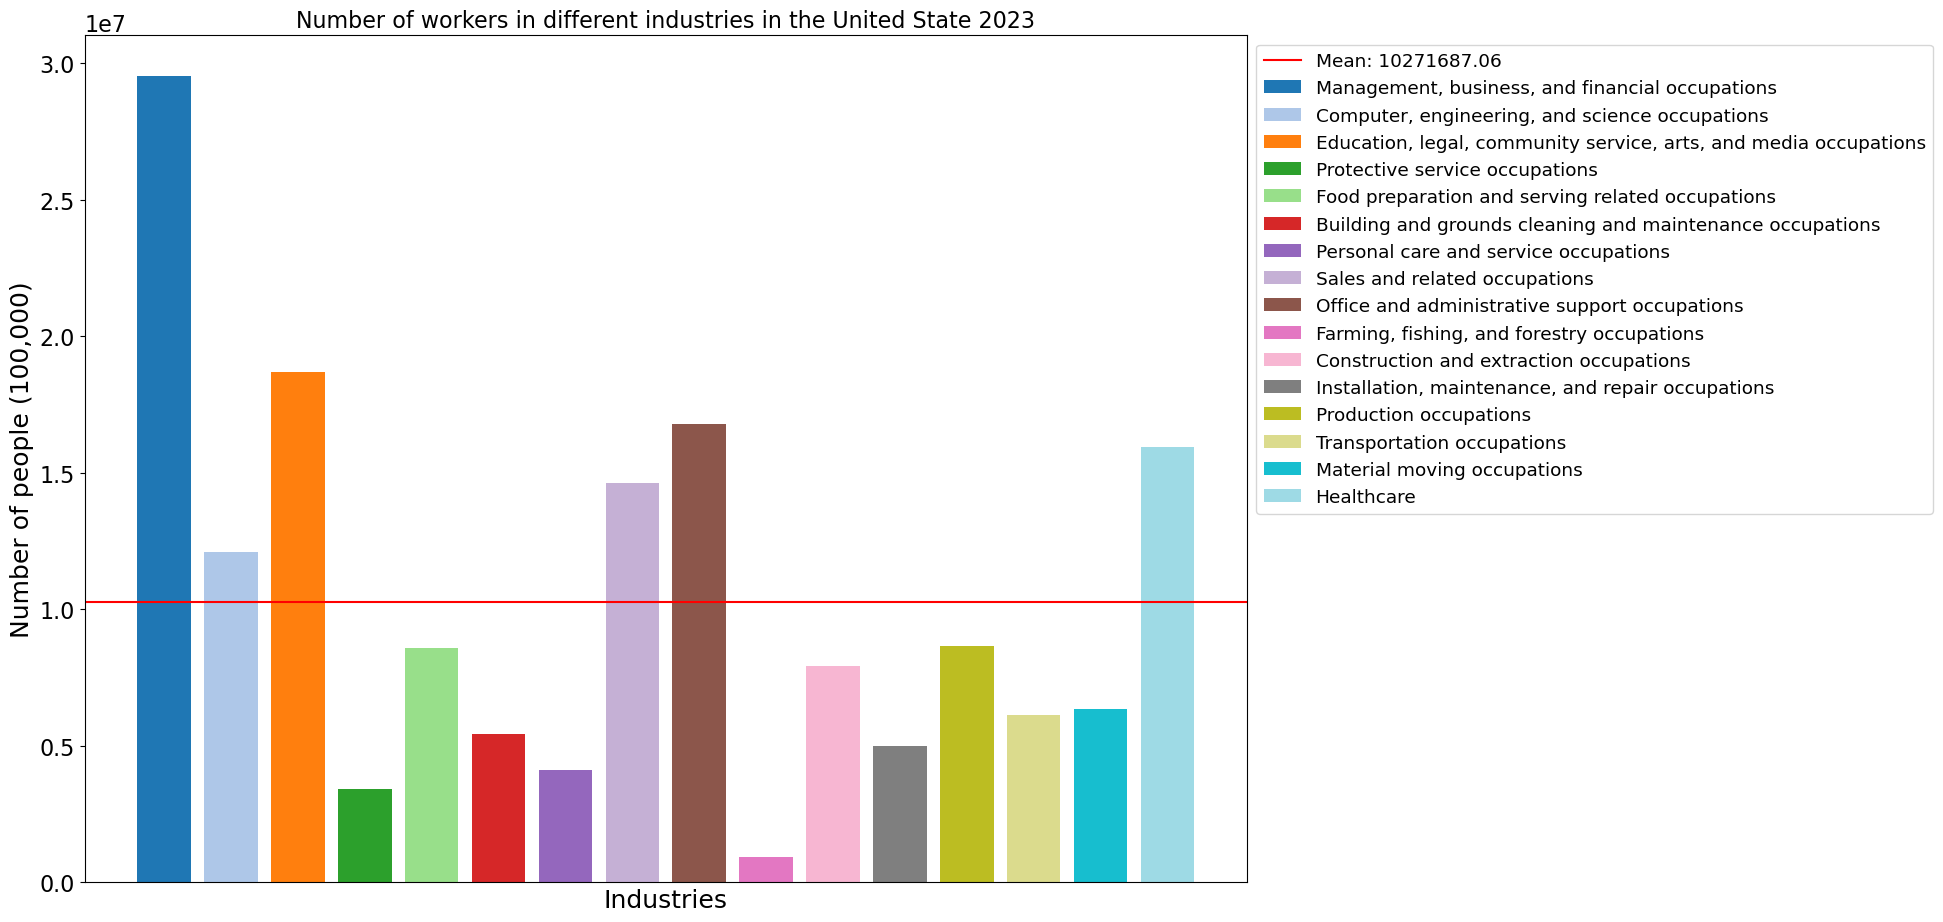

In [279]:
def plot_US(file, year):
    plt.figure(figsize=(15, 11))
    if year=='2016':
        ind, num=zip(*clean_USdata2016(file))
    if year=='2023':
        ind, num=zip(*clean_USdata2023(file))
    color_map = plt.cm.tab20(np.linspace(0, 1, len(ind)))
    for i in range(len(ind)):
        plt.bar(ind[i],num[i], color=color_map[i], label= ind[i])
    plt.axhline(np.mean(num), color='red', label=f'Mean: {np.mean(num):.2f}')
    plt.xticks([])
    plt.xlabel('Industries')
    plt.ylabel('Number of people (100,000)')
    plt.title('Number of workers in different industries in the United State '+year)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', ncol=1)
    plt.show()
plot_US(us2023, '2023')
#this is the plot we need for question 2

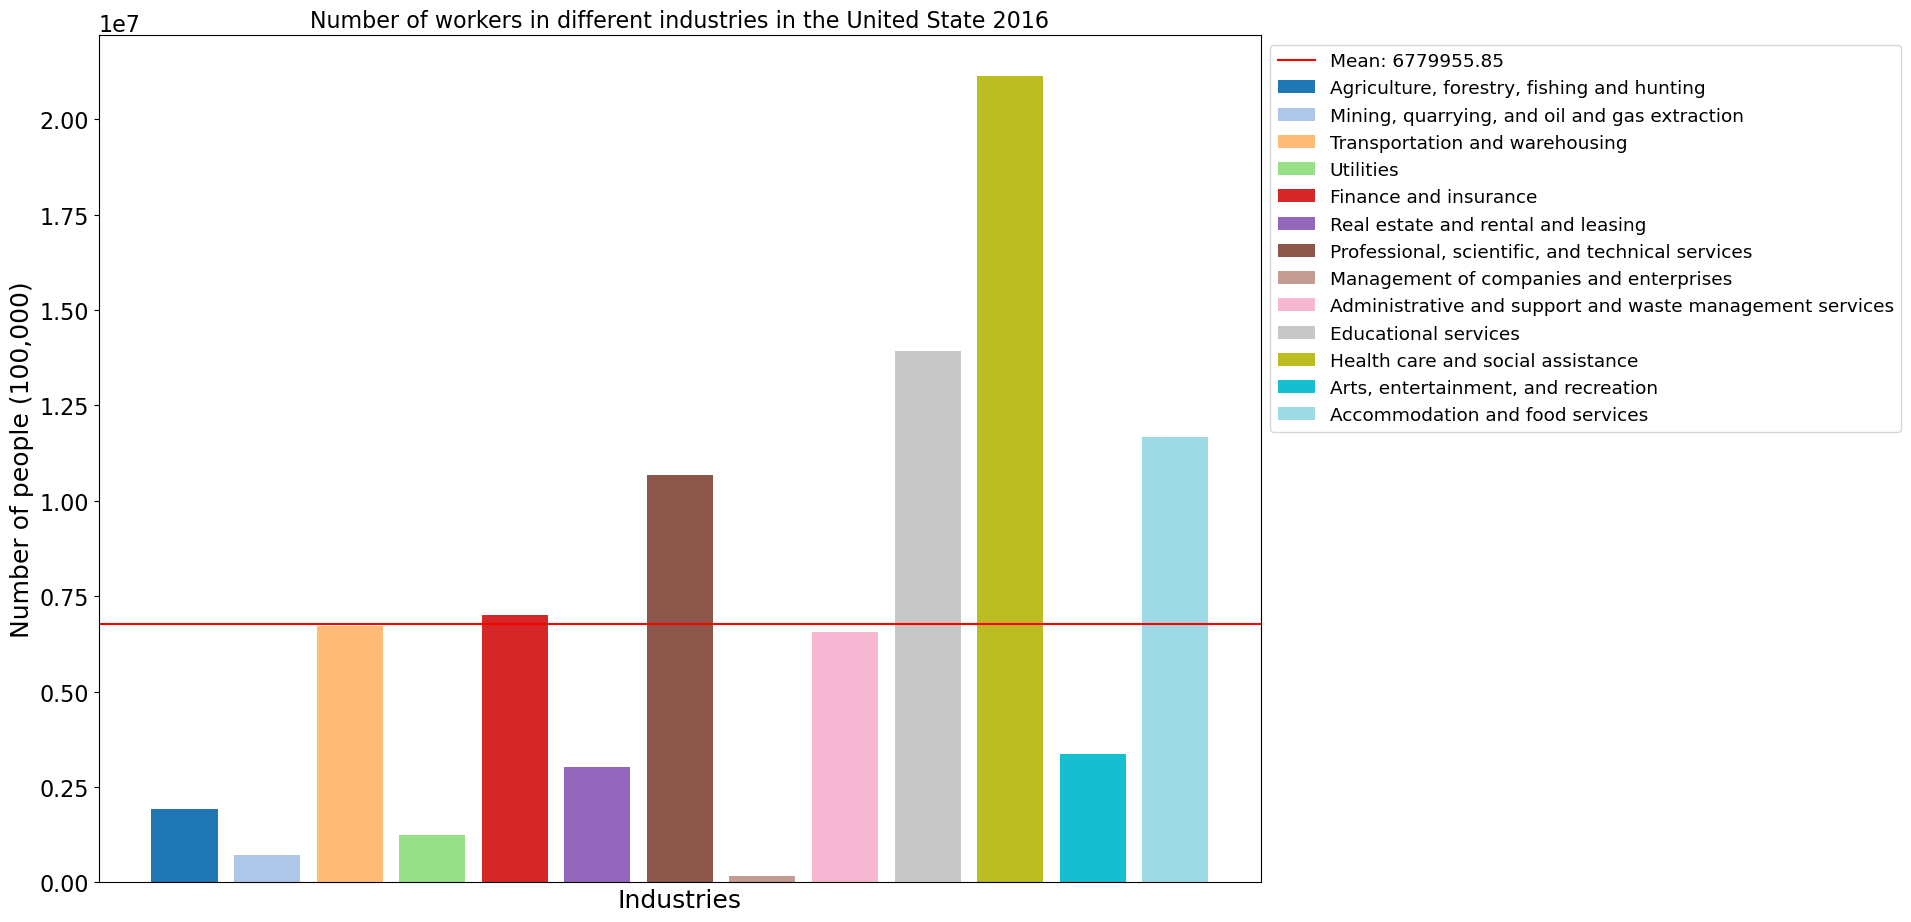

In [280]:
plot_US(us2016,'2016')
#we combine this p0lot with the one in question 2 (us 2021) to address question 4